In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

# IMPORTING LIBRARIES

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [5]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


# LOADING DATA

In [6]:
df=pd.read_csv(r'C:\Users\Lenovo\Desktop\Project Datasets\Engineering_graduate_salary.csv')

In [7]:
df.head()

,ID,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,604399,f,1990-10-22,87.80,cbse,2009,84.00,cbse,6920,1,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,988334,m,1990-05-15,57.00,cbse,2010,64.50,cbse,6624,2,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,301647,m,1989-08-21,77.33,"maharashtra state board,pune",2007,85.17,amravati divisional board,9084,2,...,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,582313,m,1991-05-04,84.30,cbse,2009,86.00,cbse,8195,1,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,339001,f,1990-10-30,82.00,cbse,2008,75.00,cbse,4889,2,...,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


# EDA & PRE-PROCESSING

In [8]:
df.shape  #There are 2998 rows and 34 columns.

(2998, 34)

In [9]:
df.columns

Index(['ID', 'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience', 'Salary'],
      dtype='object')

In [10]:
df.dtypes

ID                         int64
Gender                    object
DOB                       object
10percentage             float64
10board                   object
12graduation               int64
12percentage             float64
12board                   object
CollegeID                  int64
CollegeTier                int64
Degree                    object
Specialization            object
collegeGPA               float64
CollegeCityID              int64
CollegeCityTier            int64
CollegeState              object
GraduationYear             int64
English                    int64
Logical                    int64
Quant                      int64
Domain                   float64
ComputerProgramming        int64
ElectronicsAndSemicon      int64
ComputerScience            int64
MechanicalEngg             int64
ElectricalEngg             int64
TelecomEngg                int64
CivilEngg                  int64
conscientiousness        float64
agreeableness            float64
extraversi

In [11]:
df.describe()

,ID,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,GraduationYear,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
count,2.998000e+03,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,...,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2.998000e+03
mean,6.648926e+05,77.666264,2008.080720,74.341061,5210.210807,1.924616,71.509857,5210.210807,0.296197,2011.939960,...,24.138759,16.267845,31.068379,1.946965,-0.038714,0.126217,-0.008662,-0.145965,-0.141111,3.051748e+05
std,3.648951e+05,10.002785,1.631814,11.120299,4776.609877,0.264053,8.122462,4776.609877,0.456655,36.780582,...,99.785138,86.054739,103.552963,32.241501,1.024974,0.955831,0.962695,1.012901,1.007134,2.123312e+05
min,1.124400e+04,43.000000,1998.000000,40.000000,2.000000,1.000000,6.630000,2.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-3.893300,-5.781600,-4.600900,-2.643000,-7.375700,3.500000e+04
25%,3.334648e+05,71.140000,2007.000000,66.000000,526.250000,2.000000,66.530000,526.250000,0.000000,2012.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-0.649100,-0.435300,-0.604800,-0.868200,-0.669200,1.800000e+05
50%,6.396945e+05,78.965000,2008.000000,74.000000,4027.500000,2.000000,71.800000,4027.500000,0.000000,2013.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.172700,-0.094300,3.000000e+05
75%,9.951770e+05,85.600000,2009.000000,82.600000,8822.250000,2.000000,76.300000,8822.250000,1.000000,2014.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400,3.700000e+05
max,1.297877e+06,97.760000,2012.000000,98.700000,18409.000000,2.000000,99.930000,18409.000000,1.000000,2017.000000,...,623.000000,660.000000,548.000000,500.000000,1.995300,1.904800,2.161700,3.352500,1.630200,4.000000e+06


The average 10th and 12th percentage is 77.66% and 74.34.

The average CollegeGPA is 71.50.

The average scores in English, Logical ability and Quantitaive ability are 501.06, 500.43 and 514.13.



In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     2998 non-null   int64  
 1   Gender                 2998 non-null   object 
 2   DOB                    2998 non-null   object 
 3   10percentage           2998 non-null   float64
 4   10board                2998 non-null   object 
 5   12graduation           2998 non-null   int64  
 6   12percentage           2998 non-null   float64
 7   12board                2998 non-null   object 
 8   CollegeID              2998 non-null   int64  
 9   CollegeTier            2998 non-null   int64  
 10  Degree                 2998 non-null   object 
 11  Specialization         2998 non-null   object 
 12  collegeGPA             2998 non-null   float64
 13  CollegeCityID          2998 non-null   int64  
 14  CollegeCityTier        2998 non-null   int64  
 15  Coll

In [13]:
df.isnull().sum() #There are no null values present in the data.

ID                       0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
openess_to_experience    0
Salary                   0
dtype: int64

In [14]:
df.nunique()

ID                       2998
Gender                      2
DOB                      1633
10percentage              736
10board                   221
12graduation               13
12percentage              717
12board                   277
CollegeID                1173
CollegeTier                 2
Degree                      4
Specialization             42
collegeGPA               1064
CollegeCityID            1173
CollegeCityTier             2
CollegeState               26
GraduationYear             11
English                   109
Logical                   104
Quant                     133
Domain                    221
ComputerProgramming        76
ElectronicsAndSemicon      29
ComputerScience            19
MechanicalEngg             39
ElectricalEngg             29
TelecomEngg                24
CivilEngg                  15
conscientiousness         129
agreeableness             136
extraversion              142
nueroticism               204
openess_to_experience     131
Salary    

In [15]:
#Dropping columns that isn't required for predicting salary
df.drop(['ID','DOB','10board','12graduation','12board','CollegeID','GraduationYear','CollegeState','CollegeCityID','CollegeCityTier'],axis=1,inplace=True)

In [16]:
df.shape

(2998, 24)

In [17]:
df.nunique()

Gender                      2
10percentage              736
12percentage              717
CollegeTier                 2
Degree                      4
Specialization             42
collegeGPA               1064
English                   109
Logical                   104
Quant                     133
Domain                    221
ComputerProgramming        76
ElectronicsAndSemicon      29
ComputerScience            19
MechanicalEngg             39
ElectricalEngg             29
TelecomEngg                24
CivilEngg                  15
conscientiousness         129
agreeableness             136
extraversion              142
nueroticism               204
openess_to_experience     131
Salary                    165
dtype: int64

In [18]:
df['Gender'].unique()

array(['f', 'm'], dtype=object)

In [19]:
df['Degree'].unique()

array(['B.Tech/B.E.', 'M.Tech./M.E.', 'MCA', 'M.Sc. (Tech.)'],
      dtype=object)

In [20]:
df['Specialization'].unique()

array(['instrumentation and control engineering',
       'computer science & engineering',
       'electronics & telecommunications', 'biotechnology',
       'mechanical engineering', 'information technology',
       'electronics and communication engineering',
       'computer engineering', 'computer application',
       'computer science and technology', 'electrical engineering',
       'automobile/automotive engineering',
       'electronics and electrical engineering',
       'information science engineering', 'chemical engineering',
       'instrumentation engineering', 'electronics & instrumentation eng',
       'ceramic engineering', 'metallurgical engineering',
       'aeronautical engineering', 'electronics engineering',
       'electronics and instrumentation engineering',
       'applied electronics and instrumentation', 'civil engineering',
       'computer and communication engineering',
       'industrial & production engineering', 'computer networking',
       'other', '

From the above unique values we observed:-
1. There are 3 degree - B.Tech/B.E., M.Tech./M.E., MCA, M.Sc. (Tech.).
2. There are 42 specializations.

# VISUALIZATION

# SCATTER PLOT

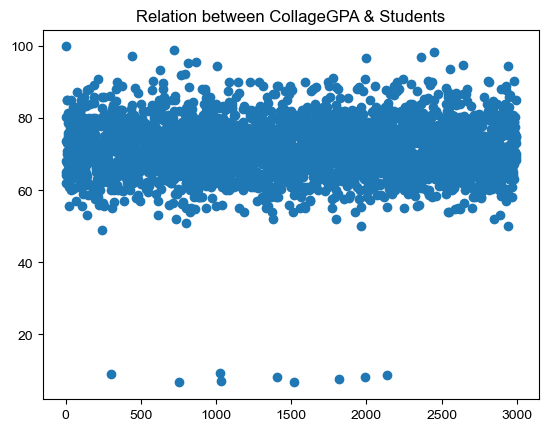

In [21]:
plt.scatter(x=df.index, y='collegeGPA', data=df)
sns.set_theme(style="darkgrid")
plt.title('Relation between CollageGPA & Students')
plt.show()
#Relation between collegeGPA and number of students

In the above scatter plot we can see most of the students GPA is between 60-85%.
The highest GPA scored is near 100%.

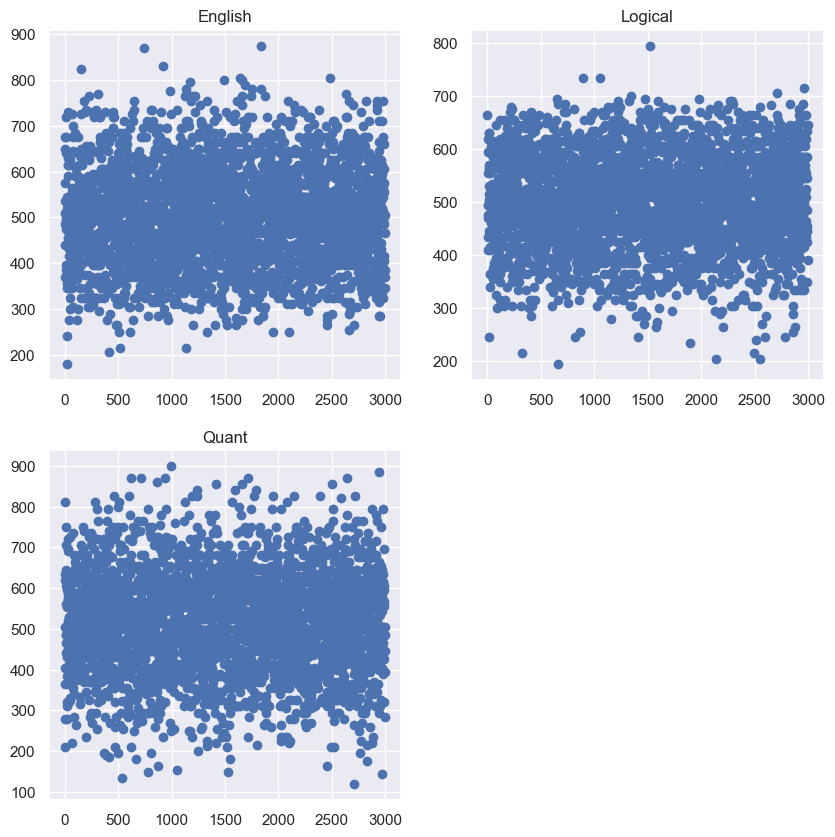

In [22]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
plt.scatter(x=df.index, y='English', data=df) #relation betweem English and number of students
plt.title('English')

plt.subplot(2,2,2)
plt.scatter(x=df.index, y='Logical', data=df) #relation betweem Logical and number of students
plt.title('Logical')

plt.subplot(2,2,3)
plt.scatter(x=df.index, y='Quant', data=df) #relation betweem Quant and number of students
plt.title('Quant')

sns.set_theme(style="darkgrid")

plt.show()

In the above scatter plots are the scores of students scored sections in AMCAT:
1. The highest score and least score in English section is near 900 and below 200.
2. The highest score and least score in Logical section is near 800 and near 200.
3. The highest score and least score in Quant section is 900 and slight above 100.


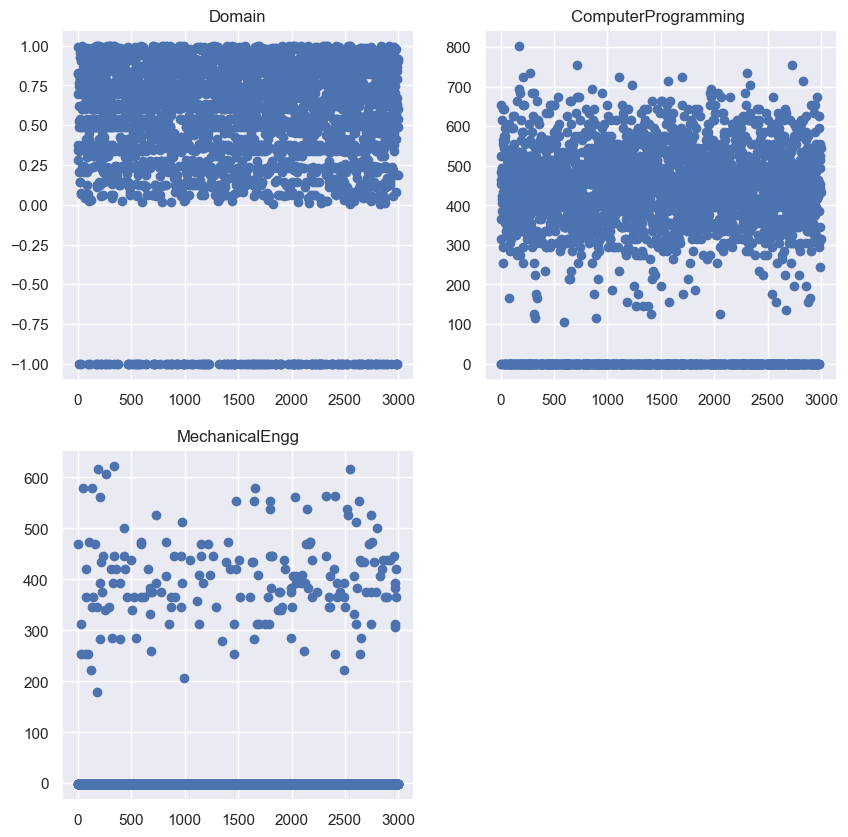

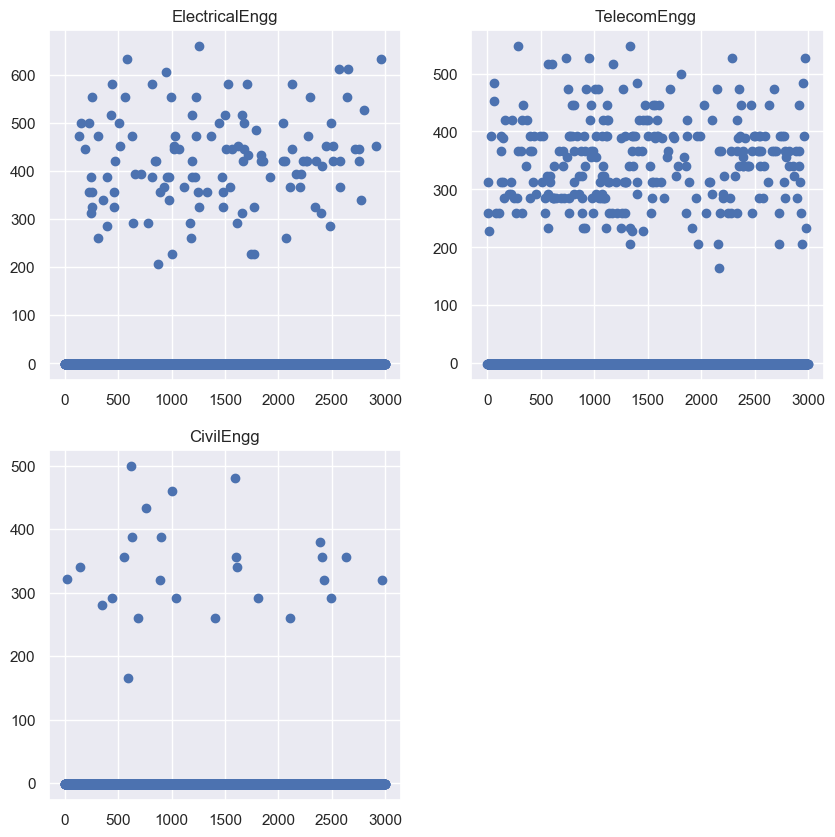

In [23]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
plt.scatter(x=df.index, y='Domain', data=df) #relation betweem Domain and number of students
plt.title('Domain')

plt.subplot(2,2,2)
plt.scatter(x=df.index, y='ComputerProgramming', data=df) #relation betweem ComputerProgramming and number of students
plt.title('ComputerProgramming ')

plt.subplot(2,2,3)
plt.scatter(x=df.index, y='MechanicalEngg', data=df) #relation betweem MechanicalEngg and number of students
plt.title('MechanicalEngg')

plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
plt.scatter(x=df.index, y='ElectricalEngg', data=df) #relation betweem ElectricalEngg and number of students
plt.title('ElectricalEngg')

plt.subplot(2,2,2)
plt.scatter(x=df.index, y='TelecomEngg', data=df) #relation betweem TelecomEngg and number of students
plt.title('TelecomEngg ')

plt.subplot(2,2,3)
plt.scatter(x=df.index, y='CivilEngg', data=df) #relation betweem CivilEngg and number of students
plt.title('CivilEngg')
plt.show()

# LINE PLOT

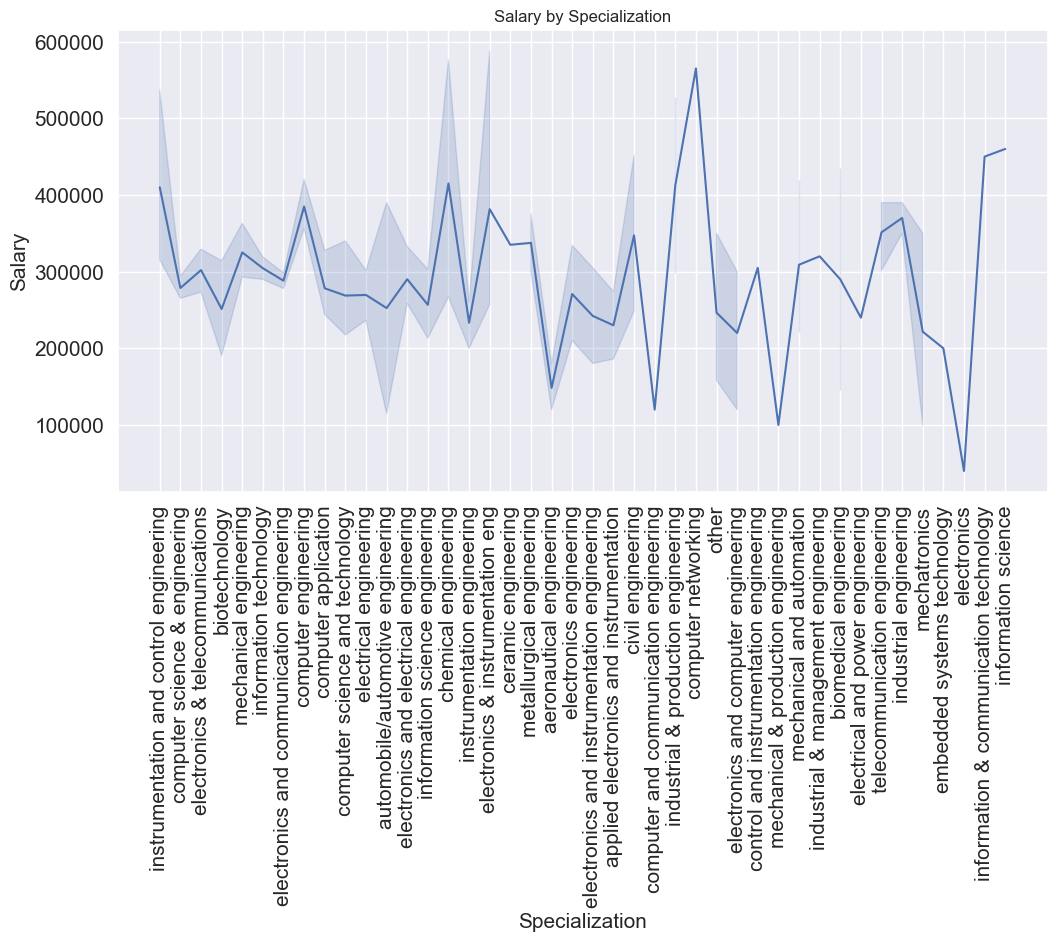

In [24]:
plt.figure(figsize=(12,6))
sns.lineplot(x='Specialization', y='Salary', data=df)
plt.title('Salary by Specialization')

plt.xlabel('Specialization',size = 15)
plt.ylabel('Salary',size = 15)

plt.xticks(rotation=90)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()

The above line plot shows the relation between specializations and salary.
1. The highest salary is above 5L in computer networking.
2. The least salary is below 1L in electronics.
3. The shaded area is the range of salary in the specialization.

# COUNT PLOT

m    2282
f     716
Name: Gender, dtype: int64


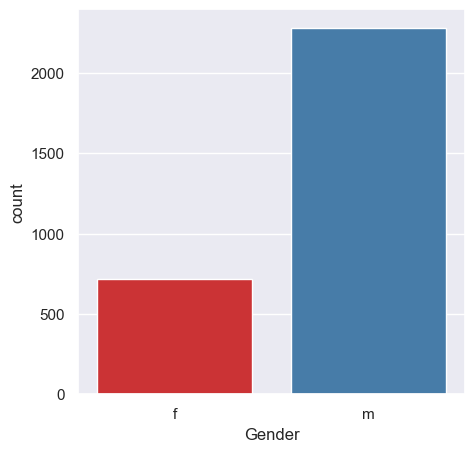

In [25]:
print(df['Gender'].value_counts())
plt.figure(figsize=(5,5))
sns.countplot(x='Gender',data=df,palette='Set1')
sns.set_theme(style="darkgrid")

plt.show()

The ratio of male to female is more.

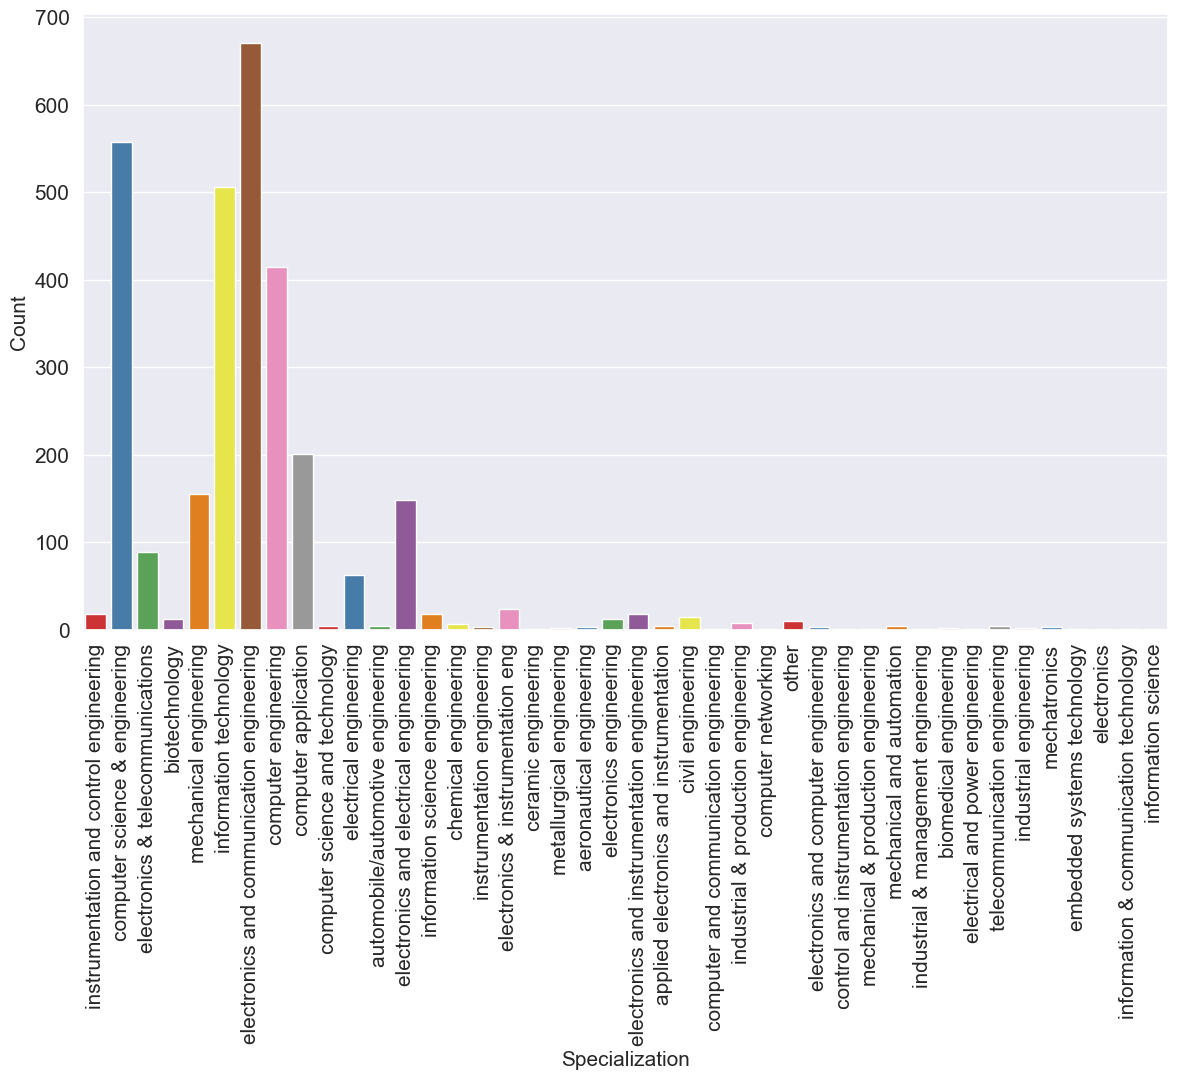

In [26]:
plt.figure(figsize=(14,8))
sns.countplot(x='Specialization',data=df,palette='Set1')

sns.set_theme(style="darkgrid")

plt.xlabel('Specialization',size = 15)
plt.ylabel('Count',size = 15)

plt.xticks(rotation=90)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()

In the above count plot we see the number of students in the specialization
1. The highest number of students are in electronics and communication engineering approx. 700 students.
2. Second highest are in computer science & engineering, approx. 550 students.
3. Third highest are in information technology, approx 500 students.


# BAR PLOT

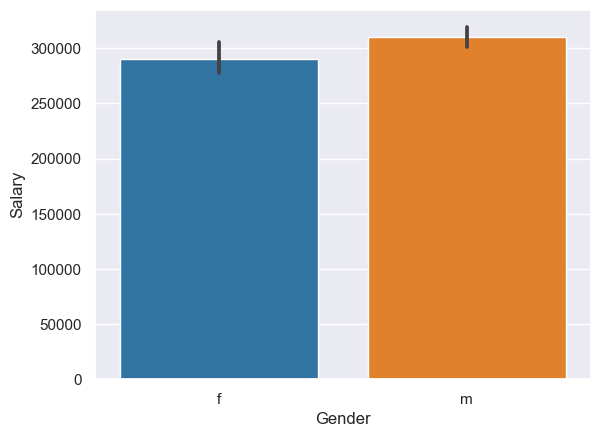

In [27]:
sns.barplot (x='Gender',y='Salary', data=df, palette='tab10')
plt.show()

# DISTRIBUTION PLOT & SALARY ANALYSIS

<function matplotlib.pyplot.show(close=None, block=None)>

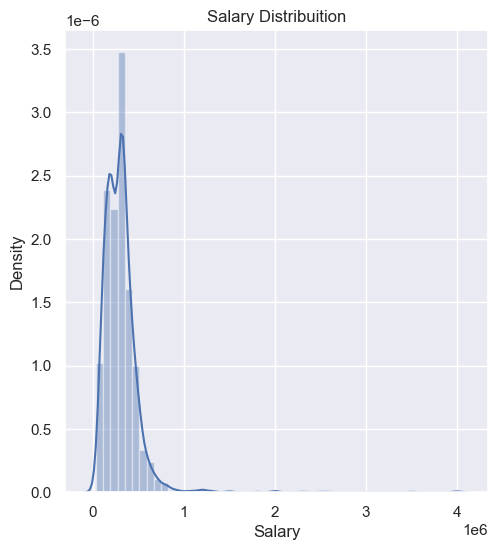

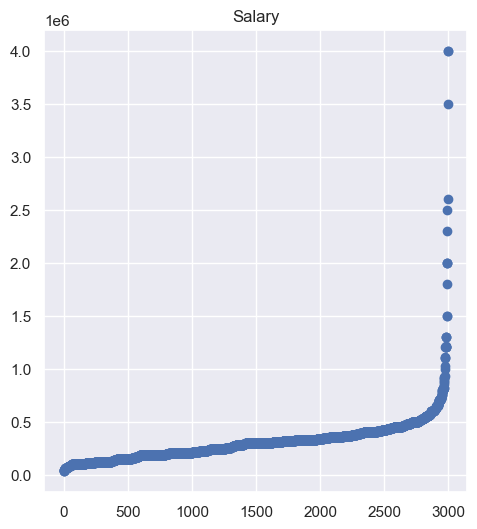

In [28]:
plt.figure(figsize = (12, 6))

plt.subplot(1,2,1)
plt.title('Salary Distribuition')
sns.distplot(df['Salary'])

plt.figure(figsize = (12,6))
plt.subplot(1,2,2)
g1 = plt.scatter(range(df.shape[0]), np.sort(df.Salary.values))
plt.title('Salary')
plt.show

The above distplot is of salary distribution
1. Most of the graduate students have salary below 10 lakhs.
2. Long tail of distribution is on right which shows that the distribution is positively skewed

# HEAT MAP

<Figure size 1200x600 with 0 Axes>

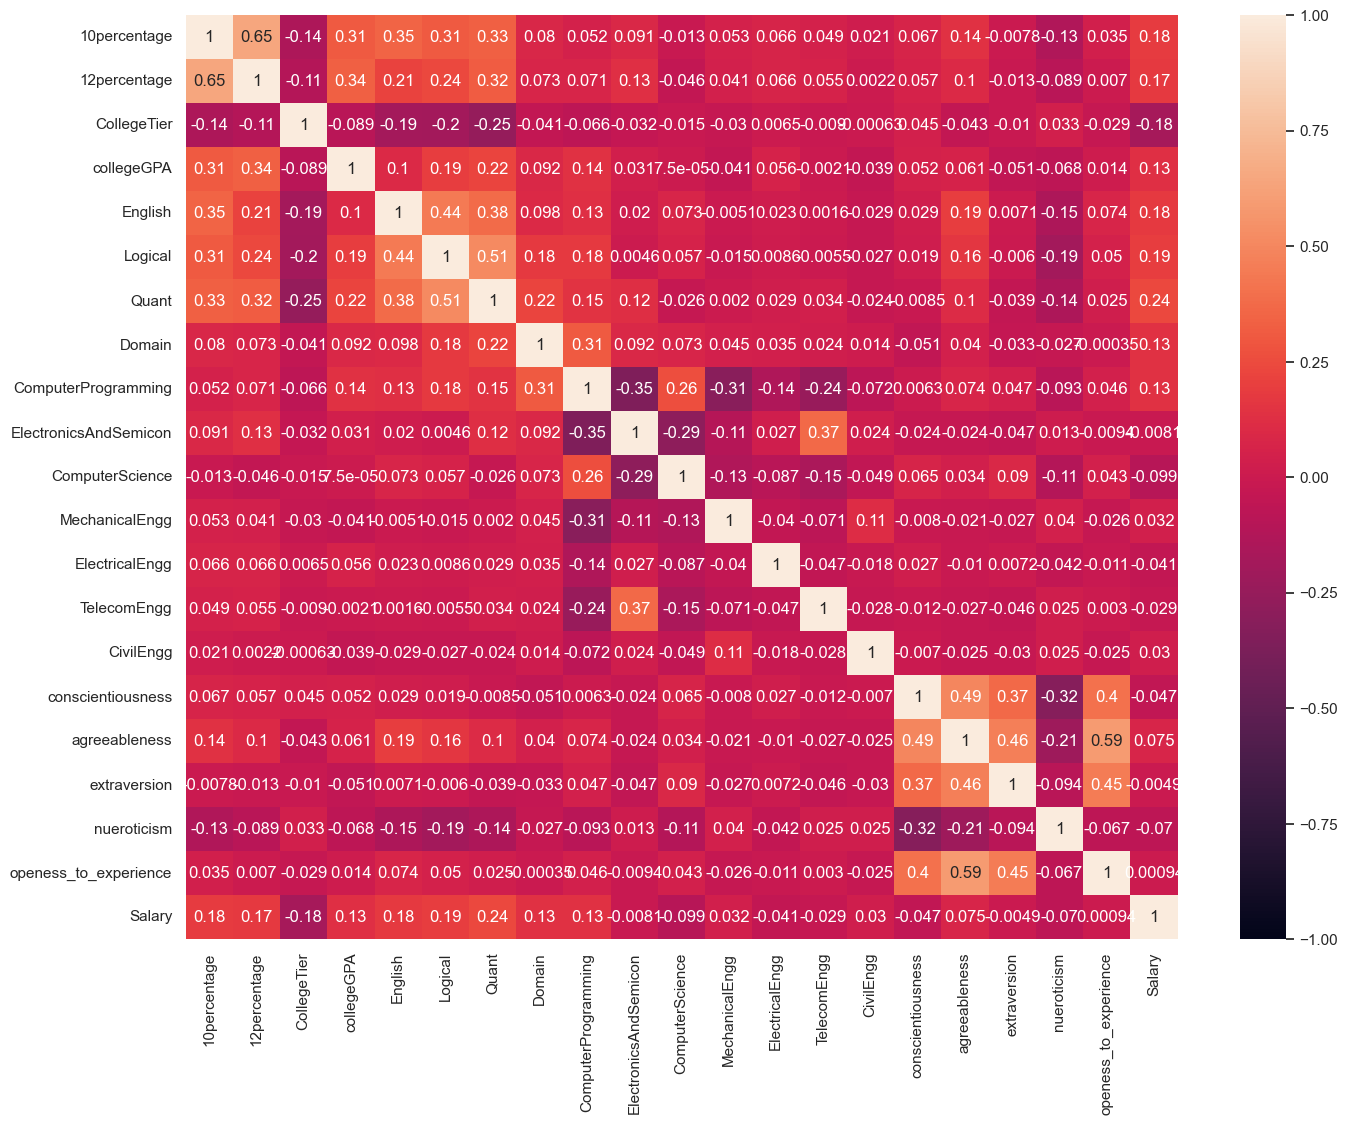

In [29]:
x= df
plt.figure(figsize=(12,6))

corr_df=x.corr(method='pearson')
plt.figure(figsize=(16,12))
sns.heatmap(corr_df,vmax=1.0,vmin=-1.0,annot=True) 
plt.show()

In [30]:
#Transforming Categorical data into Numerical data.

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df['Gender']=le.fit_transform(df['Gender'])
df['Degree']=le.fit_transform(df['Degree'])
df['Specialization']=le.fit_transform(df['Specialization'])

In [31]:
df.head()

,Gender,10percentage,12percentage,CollegeTier,Degree,Specialization,collegeGPA,English,Logical,Quant,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,0,87.80,84.00,1,0,33,73.82,650,665,810,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,1,57.00,64.50,2,0,12,65.00,440,435,210,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,1,77.33,85.17,2,0,19,61.94,485,475,505,...,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,1,84.30,86.00,1,0,12,80.40,675,620,635,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,0,82.00,75.00,2,0,4,64.30,575,495,365,...,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


In [32]:
# Creating x and y variables.
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

# x=df.iloc[:,0:-1] is used to get the coloumns and rows using indexing.

In [33]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(x)
x=scaler.transform(x)
print(x)

[[-1.78525932  1.01326047  0.86873118 ...  1.29684876  0.28819564
   0.42703642]
 [ 0.56014271 -2.06639574 -0.8851113  ...  1.29684876  0.66371445
  -0.1437872 ]
 [ 0.56014271 -0.03362266  0.97396173 ...  1.6118504  -0.14242164
  -0.14537613]
 ...
 [ 0.56014271  1.37322029 -0.78977422 ... -0.3483907   0.20564667
   0.79586712]
 [ 0.56014271  1.09725109 -0.82575048 ... -0.49913852 -1.30281721
   0.6782862 ]
 [ 0.56014271 -0.06661898  0.10423574 ...  0.33875339  1.28964495
  -2.23700573]]


In [34]:
from sklearn.model_selection import train_test_split
 
#split the data into  the test and train
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=10)

In [35]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
#As per industrial standard, test_size is 20% for less than 1000 observsations and 30% for greater than 1000 observations.

(2398, 23)
(2398,)
(600, 23)
(600,)


# LINEAR REGRESSION

In [36]:
from sklearn.linear_model import LinearRegression
#create a model object
lm=LinearRegression()
#train the model object
lm.fit(x_train,y_train)
 
# print intercept and coefficeint
print(lm.intercept_)
print(lm.coef_)

302860.8688068195
[ 10756.53783219   7670.89776448  13741.37894055 -27072.21946367
    706.83534506  -2023.22266288  11679.08522503  13290.20760331
   1823.44010056  20643.97865157  15527.74785627  14530.68538493
 -10290.50850902 -31435.89430874   3300.33026551 -12686.47443589
  -3075.03305148   6381.73241206 -15109.06666006  12503.46275429
    799.67940098 -11027.85879283  -2846.84597133]


In [37]:
y_pred=lm.predict(x_test)
print(y_pred)

[296535.57897388 270596.42008804 180638.57618302 326307.48161968
 261738.36147125 438588.26584228 255221.93702185 357100.06816941
 302531.50769098 453821.68410022 310037.66874548 336414.53988135
 344036.47679452 344983.0596098  393278.7680976  255136.27776434
 305962.92467859 290218.5261394  360922.46384666 389806.32048992
 203282.11483572 202409.68033704 219531.87376407 262721.66484451
 298243.93221686 412747.52371177 231562.9711321  299555.7187681
 234693.12240168 204995.6016724  180201.59459433 278741.50634414
 314788.20896439 233202.15456506 284433.77123125 354953.96741761
 299682.52001549 545028.89519811 342350.03917157 273541.73038218
 395190.16554233 269787.91748108 362069.98760785 255831.73035378
 289144.71491573 384990.17354544 328313.81952137 457433.26575094
 328972.92717449 377432.62544251 307527.47905279 207381.68560998
 352221.14753114 188902.46223409 385387.94401851 257241.29200038
 223516.03596269 327399.1501261  302831.19926627 230174.64476762
 321009.53131881 204159.26

In [38]:
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error, mean_squared_error

mae= mean_absolute_error(y_test,y_pred)
print("MAE:", mae)

mse= mean_squared_error(y_test,y_pred)
print("MSE:", mse)

rmse= np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE:", rmse)

r2 = r2_score(y_test,y_pred)
print("R2:", r2)

MAE: 112517.95066397778
MSE: 47905915661.14394
RMSE: 218874.20053798927
R2: 0.10728920677648879


# DECISION TREE

In [39]:
from sklearn.tree import DecisionTreeRegressor

model_DecisionTree=DecisionTreeRegressor(random_state=10)

#fit the model on data and predict the values

model_DecisionTree.fit(x_train,y_train)

y_pred1=model_DecisionTree.predict(x_test)

#print(y_pred1)
#print(list(zip(y_test,y_pred1)))

In [40]:
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error, mean_squared_error

mae= mean_absolute_error(y_test,y_pred1)
print("MAE:", mae)

mse= mean_squared_error(y_test,y_pred1)
print("MSE:", mse)

rmse= np.sqrt(mean_squared_error(y_test,y_pred1))
print("RMSE:", rmse)

r2 = r2_score(y_test,y_pred1)
print("R2:", r2)

MAE: 155683.33333333334
MSE: 86052416666.66667
RMSE: 293346.9220337358
R2: -0.6035581426869174


# RANDOM FORESTING

In [41]:
from sklearn.ensemble import RandomForestRegressor

model_RandomForest=RandomForestRegressor(n_estimators=100, random_state=10)

##fit the model in the data and predict the values

model_RandomForest.fit(x_train,y_train)

y_pred2=model_RandomForest.predict(x_test)

In [42]:
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error, mean_squared_error

mae= mean_absolute_error(y_test,y_pred2)
print("MAE:", mae)

mse= mean_squared_error(y_test,y_pred2)
print("MSE:", mse)

rmse= np.sqrt(mean_squared_error(y_test,y_pred2))
print("RMSE:", rmse)

r2 = r2_score(y_test,y_pred2)
print("R2:", r2)

MAE: 117263.81666666667
MSE: 50705345664.166664
RMSE: 225178.47513509516
R2: 0.055122760439276


# SUPPORT VECTOR REGRESSION

In [43]:
from sklearn.svm import SVR
regressor = SVR(kernel='linear')
regressor.fit(x,y)
y_pred3 = regressor.predict(x_test)


In [44]:
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error, mean_squared_error

mae= mean_absolute_error(y_test,y_pred3)
print("MAE:", mae)

mse= mean_squared_error(y_test,y_pred3)
print("MSE:", mse)

rmse= np.sqrt(mean_squared_error(y_test,y_pred3))
print("RMSE:", rmse)

r2 = r2_score(y_test,y_pred3)
print("R2:", r2)

MAE: 127957.96154779867
MSE: 53391725045.82157
RMSE: 231066.49485769583
R2: 0.005062974803207609


# XGBOOST

In [45]:
from xgboost import XGBRegressor

In [46]:
xgb = XGBRegressor()
xgb.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [47]:
y_pred4=xgb.predict(x_test)

In [48]:
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error, mean_squared_error

mae= mean_absolute_error(y_test,y_pred4)
print("MAE:", mae)

mse= mean_squared_error(y_test,y_pred4)
print("MSE:", mse)

rmse= np.sqrt(mean_squared_error(y_test,y_pred4))
print("RMSE:", rmse)

r2 = r2_score(y_test,y_pred4)
print("R2:", r2)

MAE: 121194.73901041667
MSE: 49466628225.02358
RMSE: 222410.94448120933
R2: 0.07820584761997118


# HYPERPARAMETER TUNING

# GRID SEARCH CV

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestRegressor()

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)


best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error, mean_squared_error

mae= mean_absolute_error(y_test,y_predG)
print("MAE:", mae)

mse= mean_squared_error(y_test,y_predG)
print("MSE:", mse)

rmse= np.sqrt(mean_squared_error(y_test,y_predG))
print("RMSE:", rmse)

r2 = r2_score(y_test,y_predG)
print("R2:", r2)

# All models tabled

In [49]:
final_df = pd.DataFrame({'Models':['lm','model_DecisionTree','model_RandomForest','regressor','xgb'],
                        'MAE':[mean_absolute_error(y_test,y_pred),
                                   mean_absolute_error(y_test,y_pred1),
                                   mean_absolute_error(y_test,y_pred2),
                                   mean_absolute_error(y_test,y_pred3),
                                   mean_absolute_error(y_test,y_pred4)],
                        'MSE':[mean_squared_error(y_test,y_pred),
                                   mean_squared_error(y_test,y_pred1),
                                   mean_squared_error(y_test,y_pred2),
                                   mean_squared_error(y_test,y_pred3),
                                   mean_squared_error(y_test,y_pred4)],
                        'RMSE':[np.sqrt(mean_squared_error(y_test,y_pred)),
                                   np.sqrt(mean_squared_error(y_test,y_pred1)),
                                   np.sqrt(mean_squared_error(y_test,y_pred2)),
                                   np.sqrt(mean_squared_error(y_test,y_pred3)),
                                   np.sqrt(mean_squared_error(y_test,y_pred4))],
                        'R2':[r2_score(y_test,y_pred),
                                   r2_score(y_test,y_pred1),
                                   r2_score(y_test,y_pred2),
                                   r2_score(y_test,y_pred3),
                                   r2_score(y_test,y_pred4)]})

In [50]:
final_df

,Models,MAE,MSE,RMSE,R2
0,lm,112517.950664,4.790592e+10,218874.200538,0.107289
1,model_DecisionTree,155683.333333,8.605242e+10,293346.922034,-0.603558
2,model_RandomForest,117263.816667,5.070535e+10,225178.475135,0.055123
3,regressor,127957.961548,5.339173e+10,231066.494858,0.005063
4,xgb,121194.739010,4.946663e+10,222410.944481,0.078206


# SUMMARY & CONCLUSION 

The dataset is on prediction of salary of engineer graduates.

We have loaded the libraries and data and performed EDA in which:-
1.There are 2998 rows and 34 columns.
2.No null values or duplicates.

Then we dropped the columns not required and made visualizations.

For modelling we transformed categorical data into numerical, created x and y variables, standardization and train test split.

Algorithms used are :-

1.Linear Regression :- [MAE = 112517.95, MSE = 4.790592, RMSE = 218874.20, R2 = 0.107289]

2.Random Forest:- [MAE = 117263.81 , MSE = 5.070535, RMSE = 225178.47, R2 = 0.055123]

3.XGboost :- [MAE = 121194.73, MSE = 4.946663, RMSE = 222410.94, R2 = 0.078206]
